In [18]:
import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np
import requests
import time
from scipy.stats import linregress


In [19]:
url = "https://api.covidtracking.com/v1/states/fl/daily.json"
response = requests.get(url).json()

In [20]:
response

[{'date': 20210307,
  'state': 'FL',
  'positive': 1909209,
  'probableCases': 360372,
  'negative': 9339038,
  'pending': 8544,
  'totalTestResultsSource': 'totalTestEncountersViral',
  'totalTestResults': 22339182,
  'hospitalizedCurrently': 3307,
  'hospitalizedCumulative': 82237,
  'inIcuCurrently': None,
  'inIcuCumulative': None,
  'onVentilatorCurrently': None,
  'onVentilatorCumulative': None,
  'recovered': None,
  'lastUpdateEt': '3/6/2021 23:59',
  'dateModified': '2021-03-06T23:59:00Z',
  'checkTimeEt': '03/06 18:59',
  'death': 32266,
  'hospitalized': 82237,
  'hospitalizedDischarged': None,
  'dateChecked': '2021-03-06T23:59:00Z',
  'totalTestsViral': 19482607,
  'positiveTestsViral': 2502506,
  'negativeTestsViral': 16887410,
  'positiveCasesViral': 1548837,
  'deathConfirmed': None,
  'deathProbable': None,
  'totalTestEncountersViral': 22339182,
  'totalTestsPeopleViral': 11248247,
  'totalTestsAntibody': 1054711,
  'positiveTestsAntibody': 190026,
  'negativeTestsAnt

In [21]:
date = []
#positive = []
#death = []
positiveIncrease = []
deathIncrease = []

In [22]:
count= 0
for data in range (0,len(response)):
    count=count+1
    date.append(response[data]['date'])
   # positive.append(response[data]['positive'])
   # death.append(response[data]['death'])
    positiveIncrease.append(response[data]['positiveIncrease'])
    deathIncrease.append(response[data]['deathIncrease'])


In [23]:
florida_dict = {

'Date': date,
#'Case count': positive,
#'Death count': death,
'New Cases' : positiveIncrease,
'New Deaths' : deathIncrease

}

florida_data = pd.DataFrame(florida_dict)
florida_data

,Date,New Cases,New Deaths
0,20210307,4024,66
1,20210306,4587,107
2,20210305,5876,138
3,20210304,5997,126
4,20210303,5860,133
...,...,...,...
399,20200202,0,0
400,20200201,0,0
401,20200131,0,0
402,20200130,0,0


In [24]:
florida_data = florida_data.dropna(how='any')
florida_data

,Date,New Cases,New Deaths
0,20210307,4024,66
1,20210306,4587,107
2,20210305,5876,138
3,20210304,5997,126
4,20210303,5860,133
...,...,...,...
399,20200202,0,0
400,20200201,0,0
401,20200131,0,0
402,20200130,0,0


In [25]:
florida_data.count()

Date          404
New Cases     404
New Deaths    404
dtype: int64

In [26]:
#florida_data['Case count'] = florida_data['Case count'].astype(int)

In [27]:
florida_data['New Cases'] = florida_data['New Cases'].astype(int)

In [28]:
#florida_data ['Death count'] = florida_data ['Death count'].astype(int)

In [29]:
florida_data['New Deaths'] = florida_data['New Deaths'].astype(int)

In [30]:
clean_df = florida_data [florida_data.index % 10 == 0] 
clean_df

,Date,New Cases,New Deaths
0,20210307,4024,66
10,20210225,6519,140
20,20210215,3573,159
30,20210205,11171,215
40,20210126,9466,231
50,20210116,11886,211
60,20210106,17262,132
70,20201227,7157,77
80,20201217,13102,104
90,20201207,7537,106


In [31]:
clean_df["Date"]

0      20210307
10     20210225
20     20210215
30     20210205
40     20210126
50     20210116
60     20210106
70     20201227
80     20201217
90     20201207
100    20201127
110    20201117
120    20201107
130    20201028
140    20201018
150    20201008
160    20200928
170    20200918
180    20200908
190    20200829
200    20200819
210    20200809
220    20200730
230    20200720
240    20200710
250    20200630
260    20200620
270    20200610
280    20200531
290    20200521
300    20200511
310    20200501
320    20200421
330    20200411
340    20200401
350    20200322
360    20200312
370    20200302
380    20200221
390    20200211
400    20200201
Name: Date, dtype: int64

In [32]:
clean_df['Date'] = clean_df['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
clean_df

<ipython-input-32-0f7e7aa35f1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Date'] = clean_df['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))


,Date,New Cases,New Deaths
0,2021-03-07,4024,66
10,2021-02-25,6519,140
20,2021-02-15,3573,159
30,2021-02-05,11171,215
40,2021-01-26,9466,231
50,2021-01-16,11886,211
60,2021-01-06,17262,132
70,2020-12-27,7157,77
80,2020-12-17,13102,104
90,2020-12-07,7537,106


([<matplotlib.axis.XTick at 0x21e1398beb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

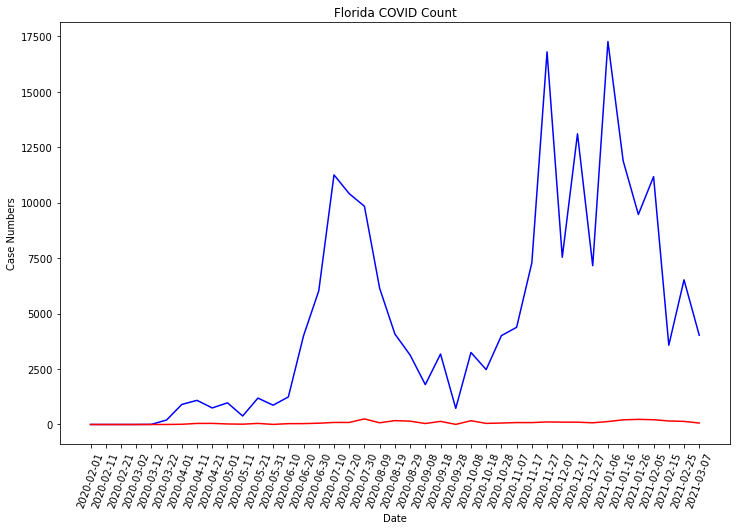

In [36]:
plt.figure(figsize=(12,7.75))
#case_count = plt.plot(clean_df['Date'], clean_df.loc[:, 'Case count'], color="blue", label="Case count")
New_cases = plt.plot(clean_df['Date'], clean_df.loc[:, 'New Cases'], color="blue", label="New Cases")
#death_count = plt.plot(clean_df['Date'], clean_df.loc[:, 'Death count'], color="red", label="Death count")
New_deaths = plt.plot(clean_df['Date'], clean_df.loc[:, 'New Deaths'], color="red", label="New Deaths")
plt.ticklabel_format(useOffset=False, style = "plain", axis='y')


plt.title("Florida COVID Count")
plt.xlabel("Date")
#plt.ylabel("Case Numbers")
plt.ylabel("Case Numbers")
plt.xticks(list(clean_df['Date'].values),rotation=70)

